In [48]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np
import torch.nn.functional as F

In [2]:
mtcnn = MTCNN(keep_all=True)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

## Get bounding boxes for detected faces

In [13]:
img1 = Image.open('../imgs/donaru.jpeg')
img2 = Image.open('../imgs/donarudo.jpeg')

boxes, _ = mtcnn.detect(img)

if boxes is not None:
    for box in boxes:
        draw = ImageDraw.Draw(img)
        draw.rectangle(box.tolist(), outline='yellow', width=3)

img.show()

NameError: name 'img' is not defined

## Extract embeddings

In [84]:
def euclidean_distance(a, b):
    return (a - b).norm().item()

def cosine_distance(a, b):
    cosim = F.cosine_similarity(a.view(-1), b.view(-1), dim=0).item()
    return (cosim + 1) / 2 * 100
    

def compare_faces(img1, img2, distance_metric='euclidean'):
    """
    :param img1: path to img1 
    :param img2: path to img2
    :return: euclidean distance between img1 and img2
    """
    
    edict = dict(e1=None, e2=None)
    for img in [img1, img2]:
        image = Image.open(img)
        faces, _ = mtcnn.detect(image)
        
        if faces is not None:
            for face in faces:
                draw = ImageDraw.Draw(image)
                draw.rectangle(face.tolist(), outline='yellow', width=3)

        display(image)
        
        aligned_image = mtcnn(image)
        if aligned_image is not None:
            embed = resnet(aligned_image)
            if edict['e1'] is None:
                edict['e1'] = embed
            else:
                edict['e2'] = embed
    
    edist = euclidean_distance(edict['e1'], edict['e2'])
    if edist < 1.0:
        print("passed euclidean distance test with edist=", edist)
    else: print("failed euclidean distance test with edist=", edist)
    
    csim_percent = cosine_distance(edict['e1'], edict['e2'])
    if csim_percent > 80:
        print("passed cosine similarity percentage test with csim=", csim_percent)
    else:
        print("failed cosine similarity percentage test with csim=", csim_percent)
    
    
    return edict['e1'], edict['e2']

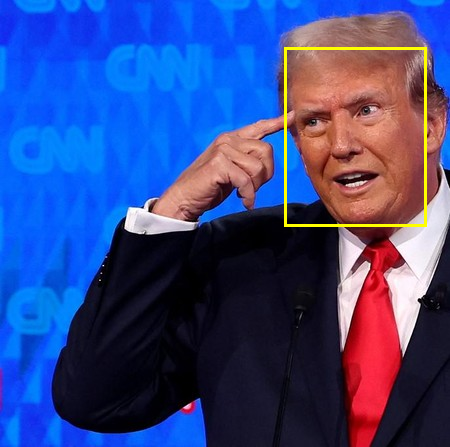

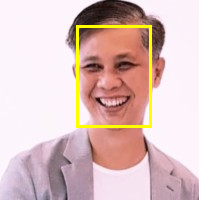

failed euclidean distance test with edist= 1.3964110612869263
failed cosine similarity percentage test with csim= 51.25090442597866


In [86]:
img1 = '../imgs/donaru.jpeg'
img2 = '../imgs/donarudo.jpeg'
img3 = '../imgs/papi.jpeg'
e1 , e2 = compare_faces(img1, img3)

In [79]:
cosim = F.cosine_similarity(e1.view(-1), e2.view(-1), dim=0).item()
cosim_percent = (cosim + 1) / 2 * 100

In [80]:
cosim_percent

60.57276427745819

In [87]:
cosim

0.21145528554916382